In [3]:
import jieba
from gensim.models import word2vec
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from matplotlib.font_manager import FontProperties
from sklearn.manifold import TSNE
font=FontProperties(fname='/Library/Fonts/標楷體.ttf',size=40)
jieba.set_dictionary('dict.txt.big.txt')

In [4]:
import pymysql

In [12]:
conn = pymysql.Connection(host='127.0.0.1',user='root',password='',charset='utf8')
cur = conn.cursor()

In [14]:
cur.execute("USE legally;")
cur.execute("SELECT ActContent FROM LAW;")

20031

In [15]:
actContent = cur.fetchall()

In [22]:
whole_content = ''
for act in actContent:
    whole_content+=act[0]

In [60]:
words = [[word for word in jieba.cut(whole_content,cut_all=True)]]

In [61]:
len(words)

1

In [63]:
model = word2vec.Word2Vec(words, size=200,sg=1,window=4,iter=1,workers=1200,min_count=5,negative=10)


In [64]:
model.wv.vocab

{'本': <gensim.models.keyedvectors.Vocab at 0x1a27a5a8d0>,
 '辦法': <gensim.models.keyedvectors.Vocab at 0x1a27a5a908>,
 '依': <gensim.models.keyedvectors.Vocab at 0x1a27a5a0f0>,
 '志願': <gensim.models.keyedvectors.Vocab at 0x1a27a5a0b8>,
 '服務': <gensim.models.keyedvectors.Vocab at 0x1a27a5a128>,
 '法': <gensim.models.keyedvectors.Vocab at 0x1a27a5a940>,
 '第十': <gensim.models.keyedvectors.Vocab at 0x1a27a5a978>,
 '第十九': <gensim.models.keyedvectors.Vocab at 0x1a27a5a080>,
 '第十九條': <gensim.models.keyedvectors.Vocab at 0x1a27a5a9b0>,
 '十九': <gensim.models.keyedvectors.Vocab at 0x1a27a5a9e8>,
 '九條': <gensim.models.keyedvectors.Vocab at 0x1a27a5aa20>,
 '第六': <gensim.models.keyedvectors.Vocab at 0x1a27a5aa58>,
 '第六項': <gensim.models.keyedvectors.Vocab at 0x1a27a5aa90>,
 '六項': <gensim.models.keyedvectors.Vocab at 0x1a27a5aac8>,
 '規定': <gensim.models.keyedvectors.Vocab at 0x1a27a5ab00>,
 '訂定': <gensim.models.keyedvectors.Vocab at 0x1a27a5ab38>,
 '之': <gensim.models.keyedvectors.Vocab at 0x1a27a5ab70

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


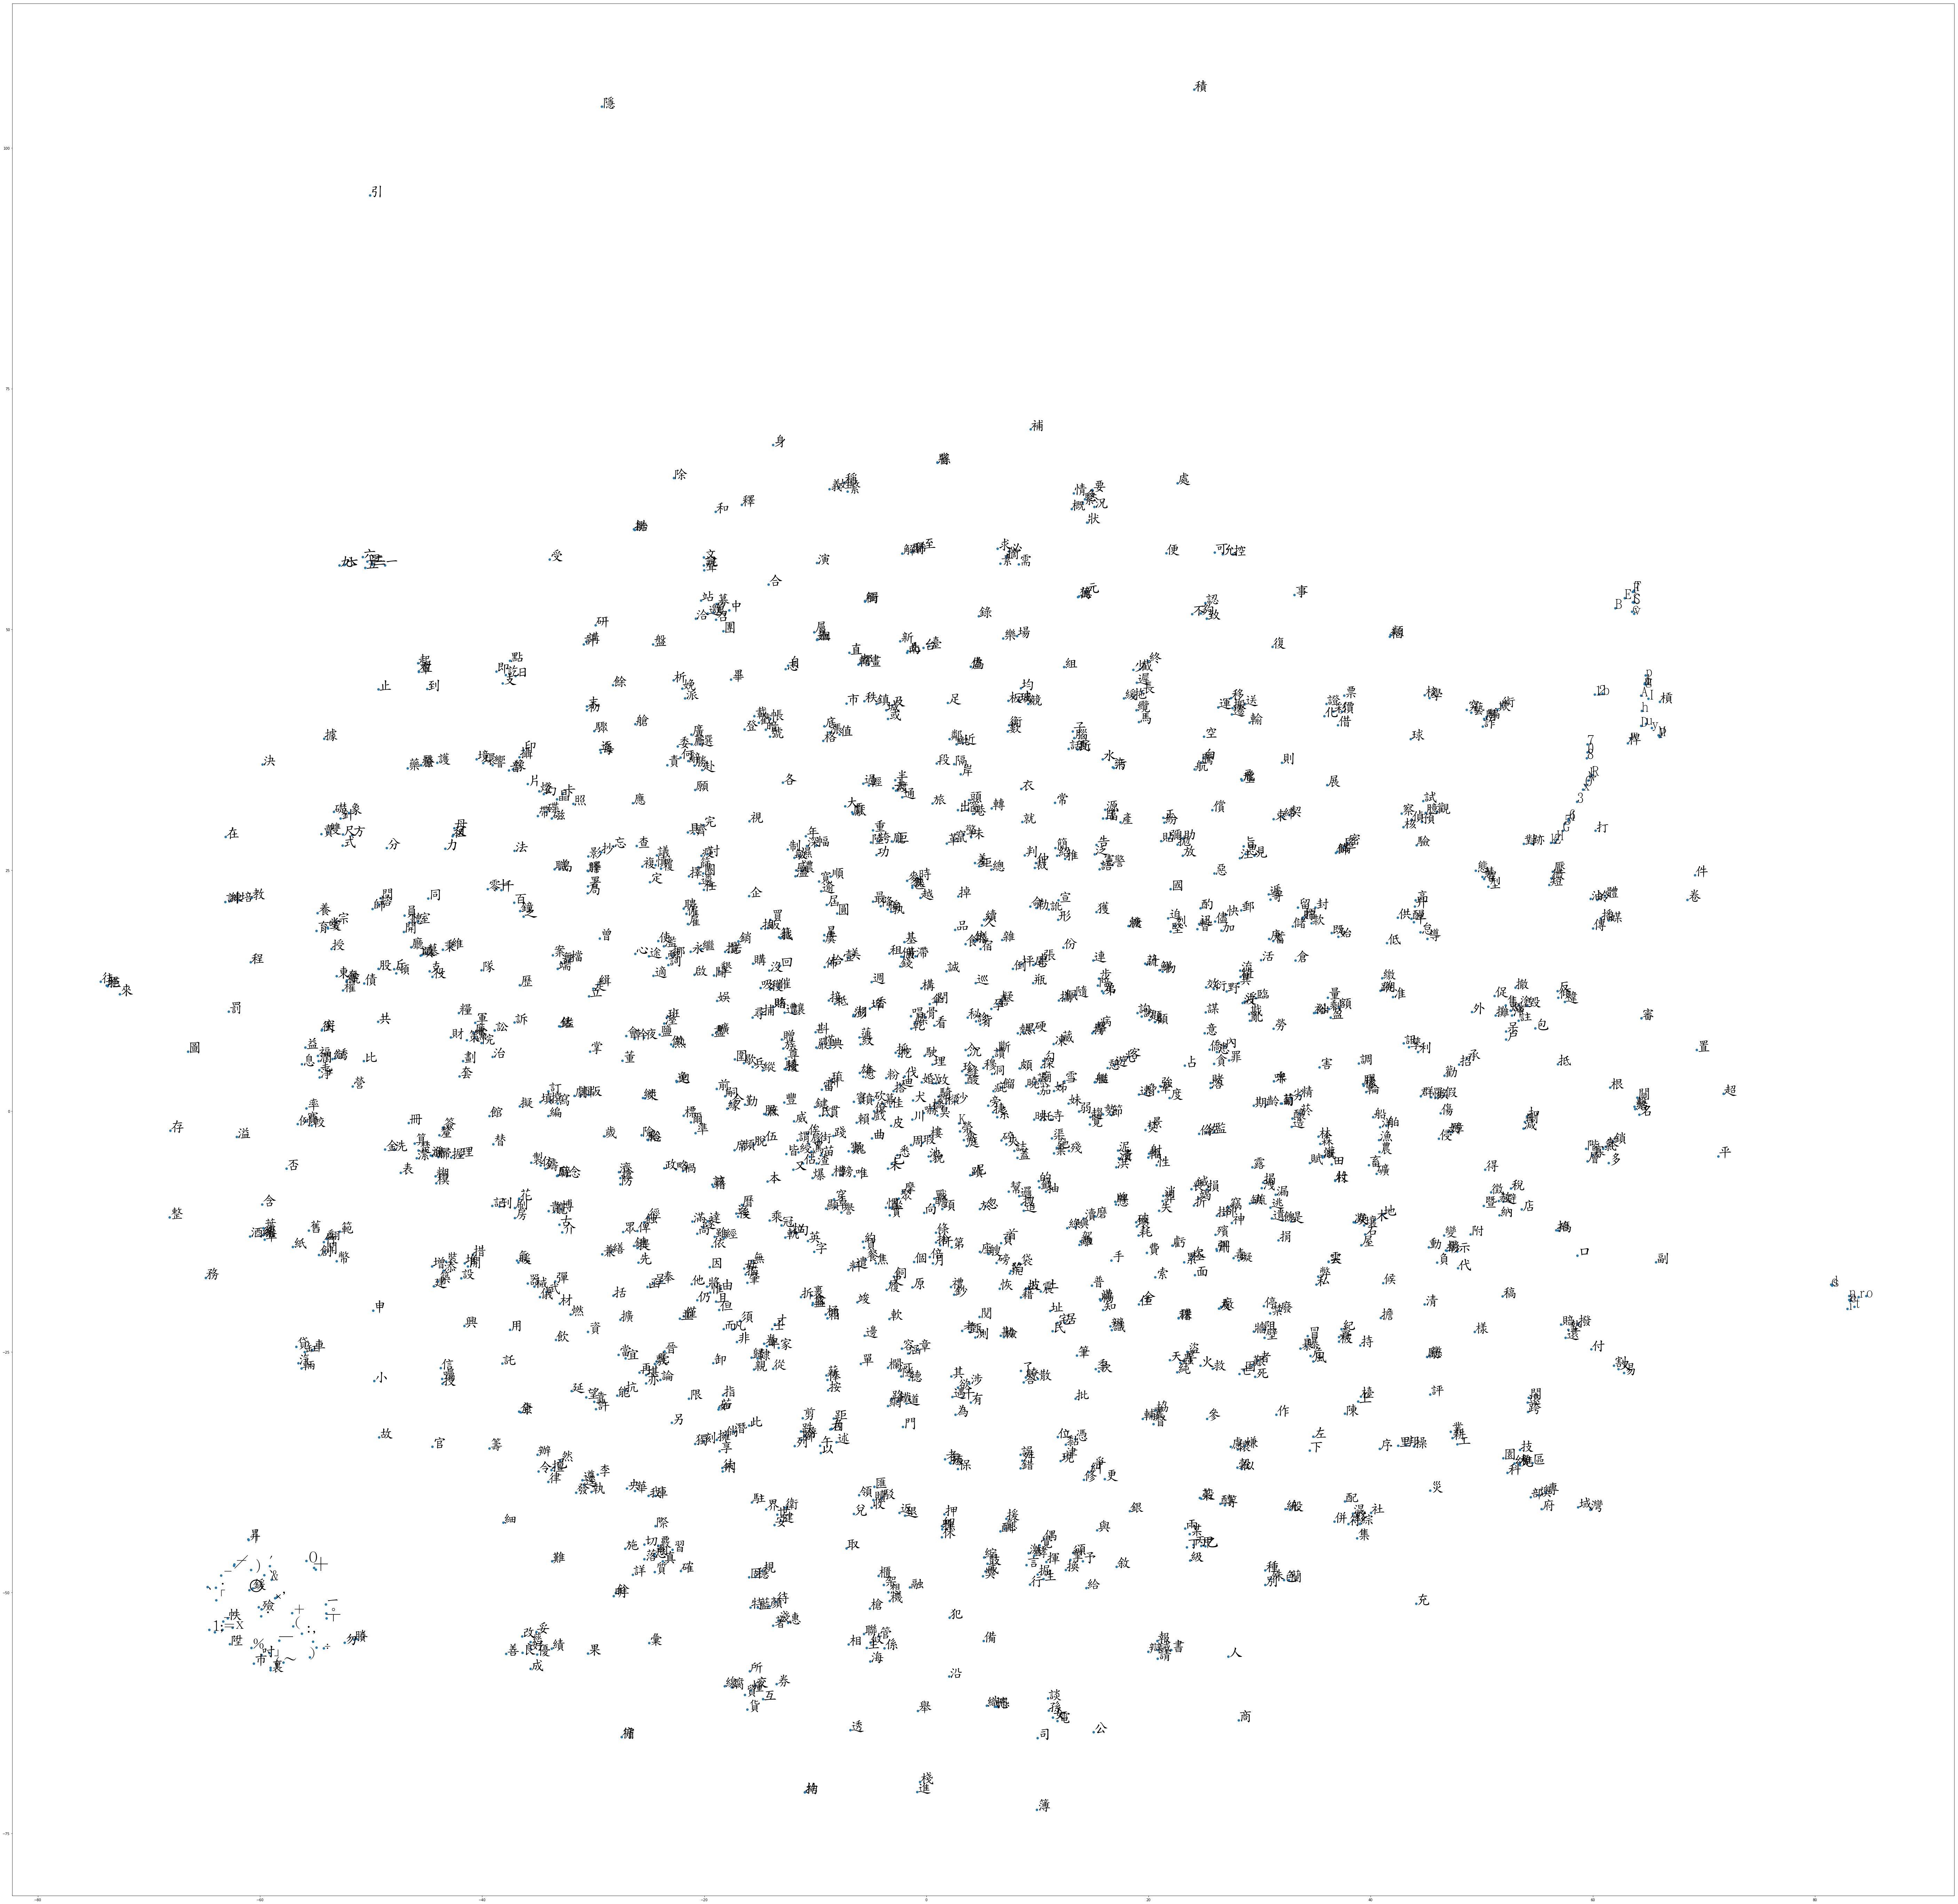

In [54]:
X = model[model.wv.vocab]
tsne = TSNE(n_components=2,perplexity=5,early_exaggeration=96,learning_rate=100,init='pca')
X_tsne = tsne.fit_transform(X)
plt.figure(figsize=(100,100))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
label = list(model.wv.vocab.keys())
for i in range(len(model.wv.vocab.keys())):
    plt.annotate(text=label[i], xy=(X_tsne[i,0], X_tsne[i,1]),fontproperties=font)

plt.show()

In [46]:
def most_similar(w2v_model, words, topn=10):
    similar_df = pd.DataFrame()
    for word in words:
        try:
            similar_words = pd.DataFrame(w2v_model.wv.most_similar(word, topn=topn), columns=[word, 'cos'])
            similar_df = pd.concat([similar_df, similar_words], axis=1)
        except:
            print(word, "not found in Word2Vec model!")
    return similar_df

In [51]:
most_similar(model,['一','買'])

,一,cos,買,cos
0,二,0.700125,贖,0.726940
1,三,0.694295,販,0.685015
2,七,0.656217,沒,0.669100
3,五,0.640930,埋,0.628243
4,六,0.634756,拍,0.584686
5,星,0.626914,檯,0.578827
6,四,0.623402,屋,0.574291
7,八,0.609128,皆,0.549801
8,九,0.605512,雙,0.549639
9,壹,0.561552,灰,0.547074


In [ ]:
model.save('word2vec.model')
model = Word2Vec.load('word2vec.model')